<a href="https://colab.research.google.com/github/sarathi-vs13/Deep-Learning/blob/main/DL_Optimizers_and_Hyperparameter_Tuning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Deep Learning Optimizers & Hyperparameter Tuning Summary


### 🔧 Key Optimizer Hyperparameters

| Hyperparameter   | Description                                               | Effect of Increase              | Effect of Decrease              |
|------------------|-----------------------------------------------------------|----------------------------------|----------------------------------|
| **Learning Rate (lr)** | Step size to update weights                           | Faster learning, may overshoot    | Slower learning, may converge stably |
| **Momentum**      | Helps accelerate in the right direction                   | Faster convergence, smoother path | May slow down or oscillate       |
| **Decay (lr_decay)** | Gradually reduces learning rate                         | Helps converge later              | Learning rate stays constant     |
| **Beta1 (Adam)**   | Momentum term for 1st moment (mean)                       | Retains longer history            | More responsive to new gradients |
| **Beta2 (Adam)**   | For 2nd moment (variance)                                 | Stable updates                    | Noisy updates                    |
| **Epsilon**        | Small value to prevent division by zero                  | Avoids NaN, rarely changed        | If too small, instability        |
| **Weight Decay**   | L2 regularization to avoid overfitting                    | More generalization               | Can underfit                     |



### 🚀 Popular Optimizers

| Optimizer   | Formula Summary | Key Hyperparameters | Pros | Cons | Use Case |
|-------------|------------------|---------------------|------|------|----------|
| **SGD**     | `w = w - lr * ∇L(w)` | lr | Simple, good generalization | Slow convergence, sensitive to lr | Baseline, low compute |
| **SGD + Momentum** | Adds velocity: `v = μv - lr∇L(w)` | lr, momentum | Faster, avoids local minima | Can overshoot | Faster convergence than SGD |
| **RMSprop** | Scales lr by moving avg of gradients | lr, decay, epsilon | Good for RNNs, handles non-stationary | Can still oscillate | RNNs, adaptive updates |
| **Adam**    | Combines Momentum + RMSprop | lr, beta1, beta2, epsilon | Fast, widely used | Can overfit, sensitive to settings | Default choice |
| **AdamW**   | Adam with decoupled weight decay | Adam + weight_decay | Better generalization | Slightly more complex | Transformers, vision models |
| **Adagrad** | Scales lr per parameter | lr, epsilon | Handles sparse data | Aggressive decay, stops learning | NLP, sparse features |
| **Adadelta**| Improvement over Adagrad | lr, rho, epsilon | Doesn’t require default lr | Limited in some tasks | Robust version of Adagrad |
| **Nadam**   | Adam + Nesterov Momentum | lr, beta1, beta2 | Slightly better convergence | Complex to tune | When Adam isn't enough |
| **LAMB**    | Layer-wise Adaptive Moments | Adam + trust ratio | Good for large batch training | Heavy computation | Large-scale pretraining |



### 🎛️ Hyperparameter Tuning Strategy

#### 🟢 When to Adjust Learning Rate
| Symptom                          | What to Do            |
|----------------------------------|------------------------|
| Loss decreases very slowly       | Increase `lr`         |
| Loss fluctuates wildly           | Decrease `lr`         |
| Model stuck in local minima      | Slightly increase `lr` |

- 🔁 Use **Learning Rate Schedulers**: `StepLR`, `ExponentialLR`, `ReduceLROnPlateau`, `OneCycle`.

#### 🔵 When to Add or Tune Momentum
| Symptom                          | What to Do            |
|----------------------------------|------------------------|
| SGD learning is too slow         | Add momentum (e.g., 0.9) |
| Training bounces around minima   | Lower momentum slightly |

#### 🟠 When to Use Weight Decay
| Symptom                          | What to Do            |
|----------------------------------|------------------------|
| Model overfitting                | Add or increase weight decay |
| Model underfitting               | Lower decay slightly        |

#### ⚙️ Learning Rate Schedulers
| Scheduler         | Use Case                               |
|-------------------|----------------------------------------|
| StepLR            | Fixed drop after epochs                |
| ExponentialLR     | Exponentially decaying learning rate   |
| ReduceLROnPlateau | Drops when validation loss stagnates   |
| OneCycleLR        | Good for fast convergence, avoids overfitting |


#### 📈 Visual Understanding

Picture a loss surface:

- **Too high `lr`** → overshoots → oscillates or diverges  
- **Too low `lr`** → slow, might get stuck in shallow minima  
- **Momentum** → adds inertia → smooths and speeds up  
- **Adam** → adapts step size → fast convergence but risk of overfitting  
- **Weight decay** → keeps model simple → prevents overfitting  


#### ✅ Best Practices

- Start with **Adam** (`lr = 1e-3`) or **SGD + Momentum** (`lr = 0.01`, `momentum = 0.9`)
- Use **validation loss** as your guide
- Use a **learning rate finder** to auto-pick `lr` range
- Try **OneCycleLR** or **ReduceLROnPlateau** for production training
- For large models, switch to **AdamW**



### 🚀 Comprehensive Optimizer & Hyperparameter Feature Table

| Optimizer     | Variable LR Support | LR Decay Needed | Momentum | Cache / Memory | Regularization Support | Best For                                 |
|---------------|----------------------|------------------|----------|-----------------|--------------------------|--------------------------------------------|
| **SGD**        | ❌                   | ✅ Optional       | ❌        | ❌               | ✅ L2                    | Simple problems, low-resource training     |
| **SGD + Momentum** | ❌               | ✅ Recommended   | ✅        | ❌               | ✅                        | Deep networks, faster convergence          |
| **NAG**         | ❌                  | ✅ Recommended   | ✅ (Lookahead) | ❌         | ✅                        | Image tasks, avoiding sharp minima         |
| **RMSprop**    | ✅                   | ❌ (Built-in)     | ❌        | ✅               | ✅                        | RNNs, noisy gradients                      |
| **Adagrad**    | ✅                   | ❌               | ❌        | ✅               | ✅                        | Sparse data, NLP                           |
| **Adadelta**   | ✅                   | ❌               | ❌        | ✅               | ✅                        | Online learning, nonstationary data        |
| **Adam**       | ✅                   | ✅ Recommended   | ✅        | ✅               | ✅                        | Default choice, most problems              |
| **AdamW**      | ✅                   | ✅ Built-in      | ✅        | ✅               | ✅ (Decoupled decay)      | Transformers, CV, NLP                      |
| **Nadam**      | ✅                   | ✅ (Nesterov)     | ✅        | ✅               | ✅                        | Faster convergence than Adam               |
| **LAMB**       | ✅                   | ✅ Recommended    | ✅        | ✅               | ✅                        | Large batch training (BERT, GPT)           |
| **Lookahead + Any** | ✅             | ✅ Wrapper        | ✅        | ✅               | ✅                        | Improves any base optimizer                |


#### 🧠 Legend & Notes

- **Variable LR Support**: Automatically adapts learning rate per parameter based on past gradients.
- **LR Decay Needed**:
  - ✅: External scheduler often helps (e.g., `StepLR`, `OneCycleLR`, `ReduceLROnPlateau`)
  - ❌: Already adapts LR internally
- **Momentum**: Uses past gradients to smooth updates (NAG looks ahead).
- **Cache / Memory**: Stores running averages of gradients or squared gradients for adaptive steps.
- **Regularization Support**: L2 weight decay or its decoupled form (used in `AdamW`, not traditional `Adam`).



#### 🎯 When to Use Which Feature

| Scenario                          | Recommended Features                           |
|-----------------------------------|------------------------------------------------|
| Simple model, easy convergence    | SGD + momentum + LR decay                      |
| Deep models, general purpose      | Adam or AdamW with LR scheduler                |
| Sparse data (e.g., NLP)           | Adagrad or Adam                                |
| RNNs with long sequences          | RMSprop or Adadelta                            |
| Transformers, large-scale training| AdamW or LAMB                                  |
| Overfitting risk                  | Add weight decay, LR decay                     |
| Noisy/unstable gradients          | Use adaptive optimizers + momentum             |
| Need fast convergence             | Use Nadam, Lookahead, or OneCycleLR            |


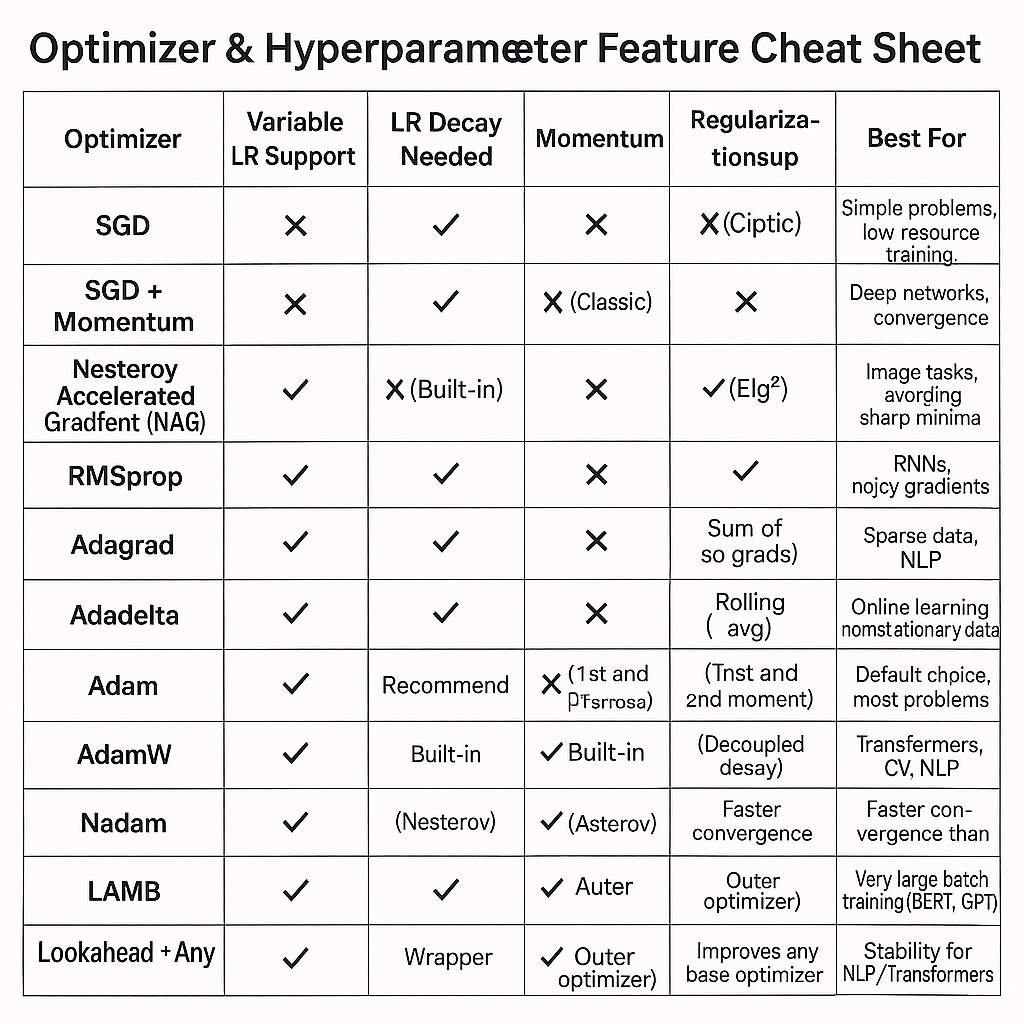

***All Informations are from Session 8 and Chatgpt***
